In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
data_f = pd.read_excel('HSA_HD_THPT_Final.xlsx')

In [6]:
data_f.head()

,Số CMND,Họ tên,Giới tính,Toán,Văn,Ngoại ngữ,Tổng tổ hợp,Tên bài thi tổ hợp,d1,d2,d3,HAS,Ngày thi
0,364237096,NGUYỄN THỊ THANH THỦY,Nữ,7.0,9.00,6.8,7.25,KHXH,19,30,13,62,19/06/2022
1,1204001455,PHẠM NGỌC BÁCH,Nam,8.8,7.75,7.0,7.25,KHTN,35,34,21,90,19/06/2022
2,1204002036,NGUYỄN ĐỨC SƠN,Nam,7.0,7.50,6.2,4.83,KHTN,20,30,17,67,02/04/2022
3,1204002669,PHẠM ANH VŨ,Nam,8.8,7.00,9.2,5.75,KHTN,27,31,22,82,07/05/2022
4,1204019455,NGUYỄN TUẤN ANH,Nam,7.8,7.00,6.4,6.08,KHTN,14,21,22,57,02/04/2022


## 1. Tổng quan dữ liệu

In [7]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Số CMND             2179 non-null   int64  
 1   Họ tên              2179 non-null   object 
 2   Giới tính           2179 non-null   object 
 3   Toán                2179 non-null   float64
 4   Văn                 2179 non-null   float64
 5   Ngoại ngữ           2178 non-null   float64
 6   Tổng tổ hợp         2178 non-null   float64
 7   Tên bài thi tổ hợp  2179 non-null   object 
 8   d1                  2179 non-null   int64  
 9   d2                  2179 non-null   int64  
 10  d3                  2179 non-null   int64  
 11  HAS                 2179 non-null   int64  
 12  Ngày thi            1917 non-null   object 
dtypes: float64(4), int64(5), object(4)
memory usage: 221.4+ KB


In [8]:
data_f.describe()

,Số CMND,Toán,Văn,Ngoại ngữ,Tổng tổ hợp,d1,d2,d3,HAS
count,2.179000e+03,2179.000000,2179.000000,2178.000000,2178.000000,2179.000000,2179.000000,2179.000000,2179.000000
mean,3.111913e+10,8.150987,7.476939,6.776676,6.967006,24.053694,31.851308,21.408903,79.135383
std,1.276912e+10,0.727994,1.026626,1.899885,1.082442,7.351802,4.728235,5.307386,14.309370
min,3.642371e+08,0.000000,0.000000,0.000000,3.330000,4.000000,13.000000,7.000000,31.000000
25%,3.020401e+10,7.800000,6.750000,5.400000,6.250000,19.000000,29.000000,18.000000,68.000000
50%,3.030400e+10,8.200000,7.750000,7.000000,7.000000,24.000000,32.000000,21.000000,79.000000
75%,3.030401e+10,8.600000,8.250000,8.200000,7.750000,29.000000,35.000000,25.000000,89.000000
max,2.523020e+11,10.000000,9.500000,10.000000,9.670000,46.000000,47.000000,39.000000,121.000000


In [25]:
data_f.isna().sum()

Số CMND                 0
Họ tên                  0
Giới tính               0
Toán                    0
Văn                     0
Ngoại ngữ               1
Tổng tổ hợp             1
Tên bài thi tổ hợp      0
d1                      0
d2                      0
d3                      0
HAS                     0
Ngày thi              262
dtype: int64

In [14]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = missing_data/len(df)*100
    print(f'Columns: {col} có {missing_percent}% data missing')

Columns: Họ tên has 0.0% data missing
Columns: Giới tính has 0.0% data missing
Columns: Toán has 0.0% data missing
Columns: Văn has 0.0% data missing
Columns: Ngoại ngữ has 0.04589261128958238% data missing
Columns: Tổng tổ hợp has 0.04589261128958238% data missing
Columns: Tên bài thi tổ hợp has 0.0% data missing
Columns: d1 has 0.0% data missing
Columns: d2 has 0.0% data missing
Columns: d3 has 0.0% data missing
Columns: HAS has 0.0% data missing


In [11]:
# df = data_f.iloc[:,:-1]
fields = ['Ngày thi', 'Số CMND']
df = data_f.drop(fields, axis = 1)

In [12]:
df

,Họ tên,Giới tính,Toán,Văn,Ngoại ngữ,Tổng tổ hợp,Tên bài thi tổ hợp,d1,d2,d3,HAS
0,NGUYỄN THỊ THANH THỦY,Nữ,7.0,9.00,6.8,7.25,KHXH,19,30,13,62
1,PHẠM NGỌC BÁCH,Nam,8.8,7.75,7.0,7.25,KHTN,35,34,21,90
2,NGUYỄN ĐỨC SƠN,Nam,7.0,7.50,6.2,4.83,KHTN,20,30,17,67
3,PHẠM ANH VŨ,Nam,8.8,7.00,9.2,5.75,KHTN,27,31,22,82
4,NGUYỄN TUẤN ANH,Nam,7.8,7.00,6.4,6.08,KHTN,14,21,22,57
...,...,...,...,...,...,...,...,...,...,...,...
2174,NGUYỄN HOÀNG TIẾN,Nam,8.2,7.50,4.6,6.58,KHTN,20,29,17,70
2175,NGUYỄN THÁI NHI,Nữ,7.8,8.50,7.0,6.17,KHXH,18,27,16,61
2176,ĐINH THỊ NGỌC LAN,Nữ,6.8,9.25,10.0,8.17,KHXH,16,35,21,72
2177,NGUYỄN THỊ LINH NGA,Nữ,7.2,7.75,8.2,8.08,KHXH,14,31,17,62


## 2. Mối tương quan dữ liệu

In [68]:
df_corr = df.corr()
df_corr

,Số CMND,Toán,Văn,Ngoại ngữ,Tổng tổ hợp,d1,d2,d3,HAS
Số CMND,1.000000,-0.009911,0.018551,0.033704,0.001846,-0.016444,-0.007205,0.008129,-0.008058
Toán,-0.009911,1.000000,-0.022124,0.208333,0.147114,0.622893,0.287893,0.405868,0.596745
Văn,0.018551,-0.022124,1.000000,0.316047,0.346625,-0.038632,0.234838,-0.040507,0.033162
Ngoại ngữ,0.033704,0.208333,0.316047,1.000000,0.188415,0.222043,0.400768,0.144961,0.327293
Tổng tổ hợp,0.001846,0.147114,0.346625,0.188415,1.000000,0.224602,0.336147,0.327360,0.344774
d1,-0.016444,0.622893,-0.038632,0.222043,0.224602,1.000000,0.297273,0.535203,0.833804
d2,-0.007205,0.287893,0.234838,0.400768,0.336147,0.297273,1.000000,0.331555,0.582012
d3,0.008129,0.405868,-0.040507,0.144961,0.327360,0.535203,0.331555,1.000000,0.753619
HAS,-0.008058,0.596745,0.033162,0.327293,0.344774,0.833804,0.582012,0.753619,1.000000


<AxesSubplot:>

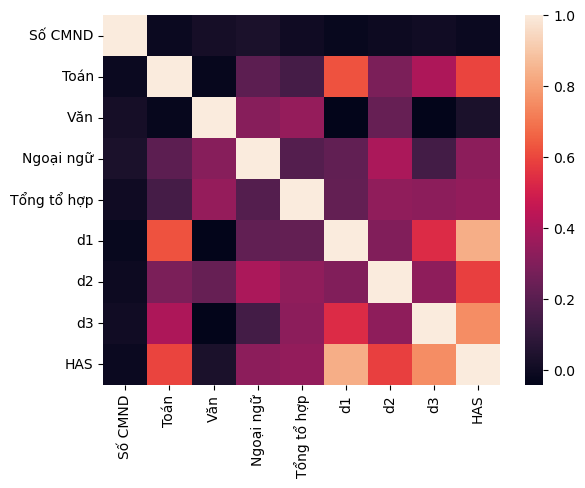

In [70]:
sns.heatmap(data=df_corr)

In [ ]:
fig, ax = plt.sublots(figsize=(10,8))

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)

sns.heatmap(data = )